In [65]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
import numpy as np
import pandas as pd

In [67]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [68]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, desc, Date

In [69]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [70]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [71]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [72]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [73]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [74]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the date and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [75]:
#First Inspect database table to get columns and data types

inspector = inspect(engine)

inspector.get_table_names()

# Get a list of column names and types

columns = inspector.get_columns("measurement")

for c in columns:
    print(c["name"], c["type"])

    # columns

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [76]:

# Display the first row's columns and data in dictionary format

first_row_Measurement = session.query(Measurement).first()
first_row_Measurement.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2565774fa58>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397'}

In [77]:

# Find last date in database

Last_Date = session.query(func.max(Measurement.date)).all()

Last_Date

[('2017-08-23')]

In [78]:
# Last Date of observation all the way back through 12 months
# Calculate the date 1 year ago from the last data point in the database
Last_Year_Observation = dt.date(2017, 8, 23) - dt.timedelta(days=7*52)

Last_Year_Observation

datetime.date(2016, 8, 24)

In [79]:
# Perform a query to retrieve the date and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > Last_Year_Observation).all()
results

[('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07', 0.0),
 ('2016-10-08',

In [80]:
# Save the query results as a Pandas DataFrame and set the index to the date column

df = pd.DataFrame(results)

df.columns =  results[0].keys()

df.set_index("date",inplace = True)

# Sort the dataframe by date

df_sorted = df.sort_values("date")

df_sorted.rename(columns = {'prcp' : 'Precipitation'}, inplace=True)

df_sorted.head(10)



,Precipitation
date,
2016-08-25,0.08
2016-08-25,0.00
2016-08-25,0.06
2016-08-25,0.00
2016-08-25,0.08
2016-08-25,0.11
2016-08-25,0.21
2016-08-26,0.00
2016-08-26,0.00


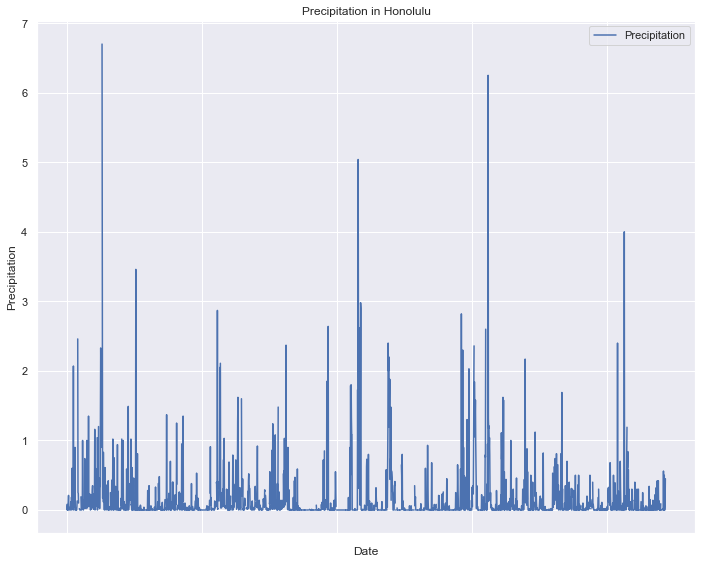

In [81]:
# Use Pandas Plotting with Matplotlib to plot the data
sns.set()

Honolulu_vac = df_sorted.plot(figsize = (10, 8))

fig = Honolulu_vac.get_figure()

plt.title("Precipitation in Honolulu")

plt.xlabel("Date")

plt.ylabel("Precipitation")

plt.legend(["Precipitation"],loc="best")

plt.xticks(rotation=45)

plt.tight_layout()

plt.savefig("Precipitation in Honolulu")

plt.show()

In [82]:

# Use Pandas to calcualte the summary statistics for the precipitation data

Summary_Stats_DF = df_sorted.describe()

Summary_Stats_DF.rename(columns = {"prcp" : "Precipitation"})

,Precipitation
count,2009.000000
mean,0.172344
std,0.452818
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [83]:
# Design a query to show how many stations are available in this dataset?
#First Inspect database table to get columns and data types

inspector = inspect(engine)

inspector.get_table_names()

# Get a list of column names and types

columns = inspector.get_columns("Station")

for c in columns:
    print(c["name"], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [84]:

# Display the first row's columns and data in dictionary format

first_row_Station = session.query(Station).first()
first_row_Station.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x25657800cf8>,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397'}

In [85]:
# Setting the dataframe for Station 

Station_results = session.query(Station.latitude,Station.longitude,Station.id,Station.elevation,Station.station,Station.name).all()

df_stations = pd.DataFrame(Station_results)

df_stations.head()

,latitude,longitude,id,elevation,station,name
0,21.2716,-157.8168,1,3.0,USC00519397,"WAIKIKI 717.2, HI US"
1,21.4234,-157.8015,2,14.6,USC00513117,"KANEOHE 838.1, HI US"
2,21.5213,-157.8374,3,7.0,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US"
3,21.3934,-157.9751,4,11.9,USC00517948,"PEARL CITY, HI US"
4,21.4992,-158.0111,5,306.6,USC00518838,"UPPER WAHIAWA 874.3, HI US"


In [86]:
# How many stations are available in this dataset - through SQL Alchemy

Number_of_Stations = session.query(Station.station).count()
 
print(f"Available Stations: {Number_of_Stations}")

Available Stations: 9


In [87]:
# What are the most active stations? (i.e. what stations have the most rows)?


conn = engine.connect()

Active_Stations = pd.read_sql("SELECT station Station, COUNT(station) Count FROM measurement GROUP BY station", conn)


# List the stations and the counts in descending order.


Active_Stations = Active_Stations.sort_values(by='Count',ascending=False).set_index('Station')
Active_Stations




,Count
Station,
USC00519281,2772
USC00519397,2724
USC00513117,2709
USC00519523,2669
USC00516128,2612
USC00514830,2202
USC00511918,1979
USC00517948,1372
USC00518838,511


In [88]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
Recordings =[]
temp = session.query(Measurement.tobs).filter(Measurement.station=='USC00519281').all()
for t in temp:
    Recordings.append(t)
temperatures = [min(Recordings), max(Recordings), np.mean(Recordings)]
temperatures

[(54.0), (85.0), 71.66378066378067]

In [89]:
# Choose the station with the highest number of temperature observations.
Station_Name = session.query(Station.name).filter(Station.station=='USC00519281').first() 

print(Station_Name)

('WAIHEE 837.5, HI US',)


In [101]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

results_WAIHEE = session.query(Measurement.date,Measurement.tobs).filter(Measurement.date > Last_Year_Observation).\
                            filter(Measurement.station == 'USC00519281').all()

results_WAIHEE_df = pd.DataFrame(results_WAIHEE)

results_WAIHEE_df.head()

,date,tobs
0,2016-08-25,80.0
1,2016-08-26,80.0
2,2016-08-27,75.0
3,2016-08-28,73.0
4,2016-08-29,78.0


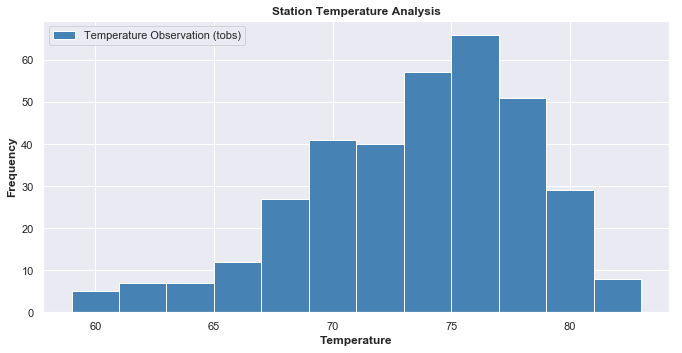

In [105]:

# Plot the results as a histogram

results_WAIHEE_df.plot.hist(bins=12, figsize=(10,5),facecolor="steelblue")

plt.xlabel('Temperature',weight='bold')

plt.ylabel('Frequency',weight='bold')


plt.title('Station Temperature Analysis',weight='bold')

plt.legend(["Temperature Observation (tobs)"],loc="best")

plt.savefig("Station Temperature Analysis.png")

plt.show()


In [92]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

In [93]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
#Calculated the temps for my trip by running calc_temps function using matching dates from last year

def calc_temps(start_date, end_date):
    select = [Measurement.date, func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*select).group_by(Measurement.date).filter(func.strftime("%Y-%m-%d", Measurement.date) >=start_date).\
    filter(func.strftime("%Y-%m-%d", Measurement.date) <=end_date).all()

# for your trip using the previous year's data for those same dates.
data = calc_temps("2017-07-01", "2017-07-16")
data

[('2017-07-01', 74.0, 77.25, 80.0),
 ('2017-07-02', 77.0, 79.2, 81.0),
 ('2017-07-03', 76.0, 79.57142857142857, 87.0),
 ('2017-07-04', 77.0, 78.0, 80.0),
 ('2017-07-05', 75.0, 78.57142857142857, 81.0),
 ('2017-07-06', 74.0, 77.16666666666667, 81.0),
 ('2017-07-07', 74.0, 77.14285714285714, 79.0),
 ('2017-07-08', 71.0, 77.16666666666667, 81.0),
 ('2017-07-09', 76.0, 79.33333333333333, 82.0),
 ('2017-07-10', 69.0, 77.85714285714286, 82.0),
 ('2017-07-11', 72.0, 77.0, 81.0),
 ('2017-07-12', 72.0, 78.28571428571429, 82.0),
 ('2017-07-13', 74.0, 78.14285714285714, 81.0),
 ('2017-07-14', 76.0, 78.83333333333333, 81.0),
 ('2017-07-15', 78.0, 80.16666666666667, 82.0),
 ('2017-07-16', 75.0, 78.33333333333333, 82.0)]

In [94]:
#Put the results into a dataframe for my bar chart
My_trip_df = pd.DataFrame(data=data, columns=["date", "tmin", "tavg", "tmax"])
My_trip2_df= My_trip_df.set_index("date", drop=True)
My_trip2_df.head()

,tmin,tavg,tmax
date,,,
2017-07-01,74.0,77.250000,80.0
2017-07-02,77.0,79.200000,81.0
2017-07-03,76.0,79.571429,87.0
2017-07-04,77.0,78.000000,80.0
2017-07-05,75.0,78.571429,81.0


In [95]:
#Created variables for my plot
My_trip_dates = My_trip2_df.index.values
My_trip_tmin = My_trip2_df["tmin"]
My_trip_tavg = My_trip2_df["tavg"]
My_trip_tmax = My_trip2_df["tmax"]
vacation_starts = '2017-07-01'
vacation_ends = '2017-07-16'


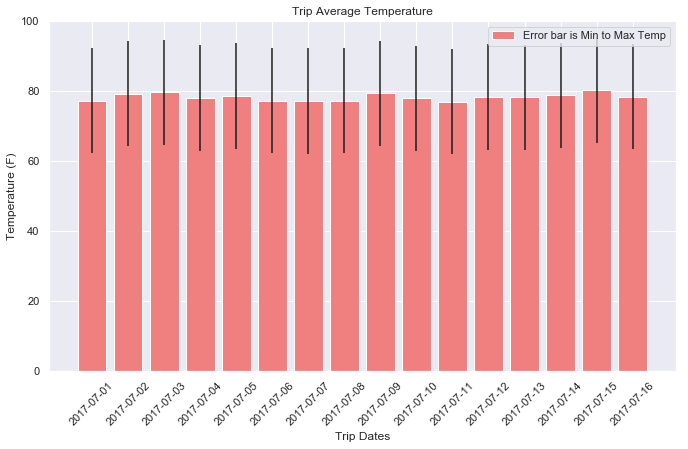

In [96]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

plt.figure(figsize=[10, 6])

pavg = plt.bar(My_trip_dates, My_trip_tavg, yerr=15, label="Error bar is Min to Max Temp",color="lightcoral")
plt.ylabel("Temperature (F)")
plt.xlabel("Trip Dates")
plt.title("Trip Average Temperature")
plt.xticks(rotation=45)
plt.legend()
plt.savefig("Trip Average Temperature.png")

plt.show()


In [97]:
#Calculate the total Avg Temp for my trip
totalavg = My_trip2_df["tavg"].mean()
totalavg

78.25133928571428

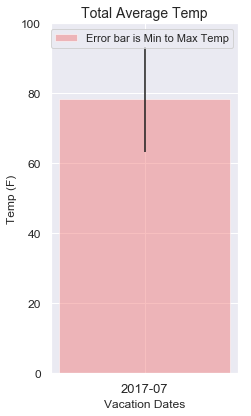

In [98]:
#Plot the total avergae temp for my trip
plt.figure(figsize=[3, 6])

totalavg_plt = plt.bar("2017-07", totalavg, yerr=15, color='lightcoral', alpha=.5, label='Error bar is Min to Max Temp')
#pmax = plt.bar(p3_date, p3_tmax)

plt.ylabel('Temp (F)', fontsize=12)
plt.xlabel('Vacation Dates')
plt.title('Total Average Temp', fontsize=14)
plt.legend()
plt.xticks(fontsize=13)
plt.yticks(np.arange(0, 120, 20), fontsize=12)
plt.savefig("Total Average Temp.png")

plt.show()


In [99]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
query = session.query(Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation, func.sum(Measurement.prcp).label('prcp')).filter(Measurement.date >= vacation_start).\
filter(Measurement.date <=vacation_end).filter(Measurement.station == Station.station).\
group_by(Measurement.station).order_by(desc(Measurement.prcp)).all()

print(query)

[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 2.8700000000000006), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 1.6400000000000001), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.8300000000000001), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.21), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.39), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, None), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.13)]


In [100]:
#!!!!It would be truly nice to go to Wakiki